<!-- ENG -->
# Exercises in Fundamentals of Data Science ⑦


<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- ENG -->
　The practice exercises this time are the following three.

　**DS7.0 | Building a data set**

　**DS7.1 | Ensemble learning**

　**DS7.2 | Analysis of prediction results using predicted probability values**

<!-- ENG -->
## DS7.0 | Building a data set

　We will be using a data set of handwritten recognition (digits data set) also this time, so let's start with the data preparation.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

d = datasets.load_digits()
images = d.images

<!-- ENG -->
　The following cell shows you the digits data set image. Since `image_index` represents the number of the image, it would be good to take a look at some of the images.

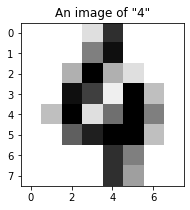

In [2]:
# display digit image
# change image_index and see each image with its label

image_index = 100
plt.figure(1, figsize=(3, 3))
plt.imshow(images[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("An image of \""+str(d.target[image_index])+"\"")
plt.show()

<!-- ENG -->
　This time as well, in order to see the generalization performance, we will split it into training data and test data, learn from only the training data, and evaluate the model by predicting the test data.

In [3]:
# make training/test data set
n_train = 1000
X_train = d.data[:n_train,:]
y_train = d.target[:n_train] # training data 
X_test = d.data[n_train:,:]
y_test = d.target[n_train:] # test data

images_train = images[:n_train]
images_test = images[n_train:]

<!-- ENG -->
## DS7.1 | Ensemble learning

　**Ensemble learning** is a method of predicting higher accuracy results using multiple learners, which do not have high prediction performance if trained individual, and outputting the results aggregated by average and majority voting, etc. In principle, any machine learning model can be used with ensemble learning, but in this case we will use decision trees, which is commonly used for ensemble learning.

<!-- ENG -->
　Before learning about specific ensemble learning methods, let's review the decision trees that we learned in the Fundamentals of Data Science ③.
The decision tree is a model that classifies the class label (dependent variable) by continuously branching it with explanatory variables which works well for classifying.



In [4]:
from sklearn import tree, metrics
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

single_tree.fit(X_train,y_train) # fitting 
y_pred = single_tree.predict(X_test) # prediction for test data set

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.7791718946047679


<!-- ENG -->
　The decision tree by itself had an accuracy of 0.779 for the test data. Let's take a look at how the accuracy will change using ensemble learning.

<!-- ENG -->
### DS7.1.1 | Bagging

<!-- ENG -->
　**Bagging** is a method of making predictions by averaging multiple decision trees or by using majority voting. In general, training from the same data set will result in the same decision tree. Obviously, averaging or majority voting of the same model will not improve the prediction accuracy, so we need to obtain different models.

　If we can process one data set to obtain several different data sets, we can train different decision trees from them. One of these methods is **bootstrap resampling**. **In bagging, multiple data sets are created using the bootstrap resampling, and decision trees are trained on each data set** to obtain different decision trees.

<!-- ENG -->
　With the bootstrap resampling, a new data set is created by randomly extracting $N$ items from a data set containing $N$ items of data **allowing for duplication (by sampling with replacement)**. Let's try applying the bootstrap resampling to some simple data.

In [5]:
import numpy as np

data_orig = np.arange(10) # make a list of [0...9] 
print(data_orig)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
data_sampled = np.random.choice(data_orig, len(data_orig)) # randomly choose from data_orig. do (len(data_orig)) times
print(data_sampled)

data_sampled = np.random.choice(data_orig, len(data_orig))
print(data_sampled)

[5 4 6 5 7 4 4 3 5 2]
[3 2 4 8 1 4 8 6 5 5]


<!-- ENG -->
　Thus, by using the bootstrap resampling, multiple data sets can be generated from a single data set. (It will be your assignment to implement bagging by yourself by using the bootstrap.)

<!-- ENG -->
　Next, let's try bagging using scikit-learn. In scikit-learn, ensemble learning methods are included in `sklearn.ensemble`. With scikit-learn's bagging (`BaggingClassifier`), the model specified in `base_estimator` can be automatically created as many as you set in `n_estimators`, and prediction can be made by majority vote or average.
　When `BaggingClassifier.fit()` is executed, multiple data sets are created internally using the bootstrap resampling, and the number of models set in `n_estimator` are trained individually.

In [7]:
from sklearn import ensemble
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0) 

bagging_dt = ensemble.BaggingClassifier(base_estimator=single_tree, n_estimators=10, random_state=0)
bagging_dt.fit(X_train,y_train) # fitting 

y_pred = bagging_dt.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.877038895859473


In [58]:
from sklearn import ensemble
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0) 

bagging_dt = ensemble.BaggingClassifier(base_estimator=single_tree, n_estimators=1000, random_state=0)
bagging_dt.fit(X_train,y_train) # fitting 

y_pred = bagging_dt.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.8983688833124216


<!-- ENG -->
　For the prediction result, let's look at the test data image, its label, and the prediction result at the same time, while changing the value of `image_index`. It is especially good to find data that had failed to be predicted.

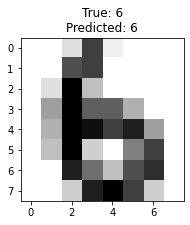

In [8]:
# display digit image
# change image_index and see each image with its label

image_index = 45
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
title_str = "True: "+str(y_test[image_index]) + "\nPredicted: "+str(y_pred[image_index]) 
plt.title(title_str)
plt.show()

---

<!-- ENG -->
##### Exercise DS7.1

　Let's try to implement the data set generation with the bootstrap resampling without using sckit-learn. The following is the code that implements the content below. Fill in `__xxxxx__`, `__yyyyy__`, and `__zzzzz__` as appropriate to make it executable. 

1. Create the data set `data_normal` with 1,000 data from a normal distribution with a mean of 0 and a standard deviation of 1.

2. Generate 10 data sets with 1,000 data from `data_normal` using the bootstrap resampling and show the mean and standard deviation of each data set.

When you are ready to execute, please make sure that the mean and standard deviation are almost identical to the original normal distribution.


In [45]:
data_normal = np.random.normal(size=1000)

num_iter = 10
for i in range(num_iter):
  data_sampled = np.random.choice(data_normal, len(data_normal))
  print(np.mean(data_sampled), np.std(data_sampled))


-0.022975700540481463 1.0129088938895563
0.043714937611056055 1.0219641082898887
-0.010639522257727557 0.999268863673289
0.06650142555608923 0.967760822517351
0.0012284258811451974 1.0219921719645537
0.02165018996864743 1.0031685798655432
0.04686211964415008 0.9874302877393346
0.04841357809386391 1.0373944487108158
-0.0566650131888119 0.983996348258565
0.005553250700135058 0.9810565816433898


---

<!-- ENG -->

##### Exercise DS7.2 (Advanced, no need to submit)

　Let's try to implement bagging by majority vote without using scikit-learn's `BaggingClassifier`.

　For the digits data set, if the number of data to be trained is 1,000, implement bagging by executing following steps.

1.   Generate a 100 item data set using the bootstrap resampling
2.   Train 100 decision trees based on each data set, using the `DecisionTreeClassifier`
3.   Take a majority vote of the results

Also, confirm that the results are generally consistent with the prediction accuracy of the bagging implemented using `BaggingClassifier`.



---

<!-- ENG -->
### DS7.1.2 | Random forest

<!-- ENG -->
　**Random forest** is an improved version of bagging, which uses the bootstrap resampling to generate a large number of data sets, and trains a decision tree from each data set. In addition to that, random forest **randomly selects only some of the explanatory variables (features) to be used in each decision tree branch**.

<!-- ENG -->
　In ensemble learning, the more diverse the properties of each learner are, the more effective the aggregation becomes. Although randomly selecting features slightly reduces the performance of a single learner, it increases the diversity of the learner. This is why random forest is considered to have better performance than bagging.

　Now let's try to train random forest the same way we did with bagging.

In [46]:
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)
rf.fit(X_train,y_train) # fitting 

y_pred = rf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy


0.9071518193224593


<!-- ENG -->
　Random forest also allows us to calculate information on how much each variable contributes to the prediction (feature importance). When performing each split in each decision tree, the contribution of the variables used for the split is given by the amount of improvement in the index used for the split. By totaling this up for the all the splits, the percentage of contribution of each variable can be obtained.
 
　Let's actually look at the importance of each variable in random forest above.

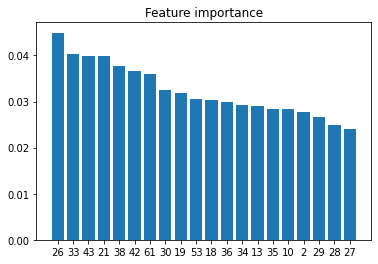

In [47]:
importances = rf.feature_importances_

# show importances as barplot
indices = np.argsort(importances)[::-1]
D = 20 # number of importances to show
plt.bar(range(D), importances[indices[:D]])
plt.xticks(range(D), indices[:D])
plt.title("Feature importance")
plt.show()

<!-- ENG -->
　The important variable IDs were listed, but this is not enough to tell which part of the image is important. Let's try to represent it with images.

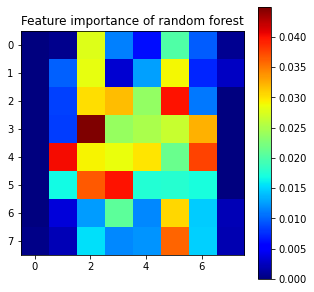

In [48]:
# show importances on image

importances_reshape = np.reshape(importances, images[0].shape)
fig, ax = plt.subplots(1, figsize=(5, 5))

im = plt.imshow(importances_reshape,
                interpolation='nearest', cmap=plt.cm.jet)
fig.colorbar(im)
plt.title("Feature importance of random forest")
plt.show()

<!-- ENG -->
　It can be seen that the importance is high in the area where the text is actually written, and that the importance is particularly high in the center.

　Note that a high importance of a particular feature only means that the data can be divided neatly when the tree is divided by that feature, and does not mean that if the value of that feature (pixel value in the case of an image) is large (or small), the character can be classified as XX (like the number "3").

---

<!-- ENG -->
##### Exercise DS7.3

　The variable `n_estimators` given to `ensemble.RandomForestClassifier()` is a parameter that represents the number of decision trees to be used for majority voting.

　How will the predicted accuracy of the test data change when the value of `n_estimators` is increased to 20, 40, ... in the digits data set? Describe it briefly.



In [60]:
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)
rf.fit(X_train,y_train) # fitting 

y_pred = rf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.9071518193224593


In [50]:
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=40, random_state=0)
rf.fit(X_train,y_train) # fitting 

y_pred = rf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.9196988707653702


In [61]:
rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)
rf.fit(X_train,y_train) # fitting 

y_pred = rf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.9335006273525721


---

<!-- ENG -->
### DS7.1.3 | Boosting

<!-- ENG -->
　**Boosting** differs from bagging and random forest. It does not train each decision tree individually, but trains them in sequence while changing the weights of the data. In this exercise, we will use **AdaBoost**, which is a representative boosting method.

　In AdaBoost, set the weights of the data that has been incorrectly predicted in the past to be greater, and the final prediction is made by the weighted average of each decision tree. The weight of each decision tree increases as the prediction accuracy of the training data when using that tree is higher.

　Let's actually try training AdaBoost.

In [56]:
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0) 
ada_dt = ensemble.AdaBoostClassifier(base_estimator=single_tree, n_estimators=10, random_state=0)
ada_dt.fit(X_train,y_train) # fitting 

y_pred = ada_dt.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy

0.9196988707653702


In [55]:
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0) 
ada_dt = ensemble.AdaBoostClassifier(base_estimator=single_tree, n_estimators=1000, random_state=0)
ada_dt.fit(X_train,y_train) # fitting 

y_pred = ada_dt.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test)) # test accuracy


0.9385194479297365


---

<!-- ENG -->

##### Exercise DS7.4
　Compare the prediction accuracy of the test data for bagging, random forest, and AdaBoost when the number of trees is 10, and answer in order of increasing performance.

　Also, answer in the same order of performance for the case where the number of trees is 1,000.



---

<!-- ENG -->
##### Exercise DS7.5 (Advanced)

　In the above example, we have explicitly specified that we want to use a decision tree with a maximum depth of 10 as seen in `ensemble.AdaBoostClassifier(base_estimator=single_tree, ...)`, if we do not give a `base_estimator`, what kind of learner would be used to execute AdaBoost?
Answer by referring to the [API Reference](https://scikit-learn.org/stable/modules/classes.html) for scikit-learn.



---

<!-- ENG -->
## DS7.2 | Analysis of prediction results using predicted probability values

<!-- ENG -->
　Since the ensemble learning we learned this time uses majority voting (bagging and random forests use simple majority voting, while boosting uses weighted majority voting), **the ensemble learning can output probability values**. Here, we will use `n_estimators=1000` bagging to visually identify the "easy to predict case" and "hard to predict case".

　For outputting probability values, we can use `predict_proba()` instead of `predict()`.

In [ ]:
from sklearn import tree, ensemble
single_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=0) 

bagging_dt = ensemble.BaggingClassifier(base_estimator=single_tree, n_estimators=1000, random_state=0)
bagging_dt.fit(X_train,y_train) # fitting 

In [ ]:
y_pred_proba = bagging_dt.predict_proba(X_test)
print(y_pred_proba)
print(y_pred_proba.shape)

<!-- ENG -->
For each image, we can see that 10 different probability values are predicted (note that the decision tree itself also makes probabilistic predictions when the training data cannot be completely separated, so be aware that the probability values are the ones which cannot be expressed in $k/1000$).

　Next, as an "easy to predict case", let's check the data in which the predicted probability value for a single character is `1.0`.

In [ ]:
import numpy as np
easy_case = np.max(y_pred_proba, axis=1)==1 # Extract the prediction results with a maximum value of 1.0
images_test_easy = images_test[easy_case]
y_pred_proba_easy = y_pred_proba[easy_case]
y_test_easy = y_test[easy_case]
print(len(y_test_easy)) # Check the number of easy cases
print(y_test_easy)

In [ ]:
image_index = 0
print(y_pred_proba_easy[image_index])
print("predicted as", y_pred_proba_easy[image_index].argmax())
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test_easy[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("An image of \""+str(y_test_easy[image_index])+"\"")
plt.show()

<!-- ENG -->
　Looking at the results, "0" and "6" seem to be fairly  predictable (confirm that the characters are indeed human-readable by visually inspecting them while changing the `image_index`).

　Next, let's look for the "hard to predict case", where every predicted probability value is less than `0.5`.

In [ ]:
hard_case = np.max(y_pred_proba, axis=1)<0.5 # Extract cases where all probability values are less than 0.5
images_test_hard = images_test[hard_case]
y_pred_proba_hard = y_pred_proba[hard_case]
y_test_hard = y_test[hard_case]
print(len(y_test_hard)) # Check the number of hard cases
print(y_test_hard)

In [ ]:
image_index = 77
print(y_pred_proba_hard[image_index])
print("predicted as", y_pred_proba_hard[image_index].argmax())
plt.figure(1, figsize=(3, 3))
plt.imshow(images_test_hard[image_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("An image of \""+str(y_test_hard[image_index])+"\"")
plt.show()

<!-- ENG -->
　While there are a few cases that are clearly difficult to predict (even by human eyes) (e.g., `image_index = 1`), there are also cases that are obvious to humans (e.g., `image_index = 77`). By focusing on similar such cases, **it is possible to devise ideas for improving input features to the learner**, for example, "since the lower right part of the image is important for separating "2" and "7", you can create additional features”, which is called feature engineering.
It is always a good idea to check the relationship between the prediction results and the original data, and to "love the data".

---------

<!-- ENG -->

# Report submissions (FY2021)



<!-- ENG -->
## How to submit reports

　The report should be submitted **via T2SCHOLA**. **Submit by one week later**. Be sure to submit your work with plenty of time to spare as the form cannot receive after the deadline.


<!-- ENG -->
## Answer Sheet Template

```
Student ID number:
Name:

Exercise DS7.1
__xxxxx__ = __________
__yyyyy__ = __________
__zzzzz__ = __________

Exercise DS7.3
(Write your answer)

Exercise DS7.4
Prediction accuracy when the number of trees is 10.  ________ > ________ > ________
Prediction accuracy when the number of trees is 1,000.  ________ > ________ > ________

Exercise DS7.5
When the base_estimator is not specified, _________________ is used.

```
